<a href="https://colab.research.google.com/github/dariamm03/Machine_Learning/blob/main/MachineLearning8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание
- Построить регрессионную модель и спрогнозировать число сданных в аренду велосипедов.
- Ввести граничное значение (например, экономически выгодное значение числа сданных в аренду) для велосипедов и ввести дополнительную колонку (колонку класса) означающую эффективность дня  (1 - эффективный; 0 - не эффективный).
- Построить модель классификации для предсказания дней эффективной работы.
- Сравнить качество моделей предсказания дней эффективной работы (модели регрессии и классификации)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [ ]:
data = pd.read_csv('DataSet5_2.csv', sep=',')
data.head(8)

,count,holiday,humidity,registered,summer,temp,windspeed,workingday
0,2,0,81,2,0,10.66,22.0028,1
1,157,0,54,150,1,18.04,16.9979,1
2,233,0,40,199,1,37.72,15.0013,1
3,98,0,88,86,1,22.14,19.0012,1
4,6,0,74,6,0,6.56,6.0032,1
5,176,0,32,172,0,9.02,39.0007,1
6,64,0,37,61,0,9.02,27.9993,1
7,239,0,48,149,1,28.70,6.0032,0


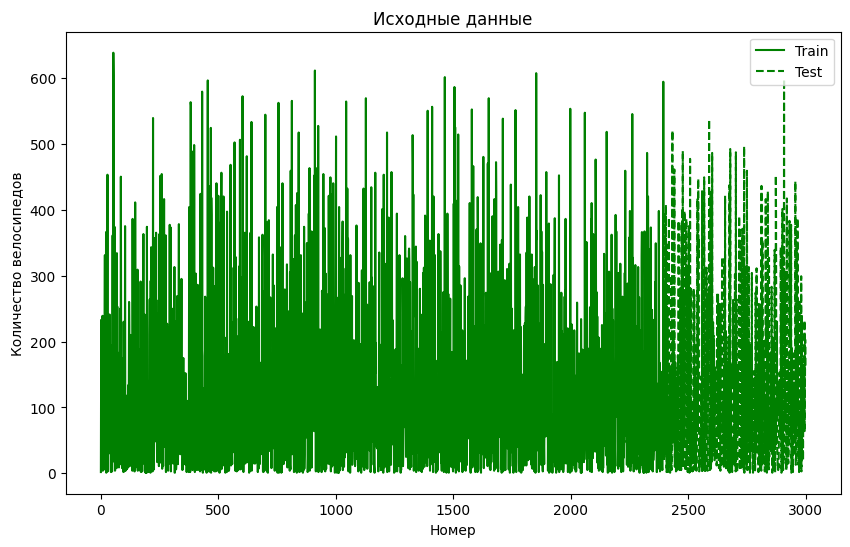

In [ ]:
start_ind = 0
end_ind = len(data)
n = round(0.8*(end_ind - start_ind))
train = data[0:n]
test=data[n:]

flg, ax = plt.subplots(figsize=(10,6))
ax.plot(train['count'].index, train['count'], color = 'green', linestyle='solid')
ax.plot(test['count'].index, test['count'], color = 'green', linestyle='dashed')

ax.set(title="Исходные данные", xlabel="Номер", ylabel="Количество велосипедов")
ax.legend(['Train', 'Test'])
plt.show()

In [ ]:
train_x = train.drop(['count'], axis=1, inplace=False)
train_y = train['count']
test_x = test.drop(['count'], axis=1, inplace=False)
test_y = test['count']
train_x.head(8)

,holiday,humidity,registered,summer,temp,windspeed,workingday
0,0,81,2,0,10.66,22.0028,1
1,0,54,150,1,18.04,16.9979,1
2,0,40,199,1,37.72,15.0013,1
3,0,88,86,1,22.14,19.0012,1
4,0,74,6,0,6.56,6.0032,1
5,0,32,172,0,9.02,39.0007,1
6,0,37,61,0,9.02,27.9993,1
7,0,48,149,1,28.70,6.0032,0


**Регрессия**

In [ ]:
from scipy.optimize import curve_fit
def func(x, a, b, c, d, e, i, j):
  return a + b*x['holiday'] + c*x['humidity'] + d*x['summer'] + e*x['temp'] + i*x['windspeed'] + j*x['workingday']

args, covar = curve_fit(func, train_x, train_y)
a, b, c, d, e, i, j = args[0], args[1], args[2], args[3], args[4], args[5], args[6]

res_y_tr = func(train, a, b, c, d, e, i, j)
res_y_ts = func(test, a, b, c, d, e, i, j)

res_y = list(res_y_tr)+list(res_y_ts)

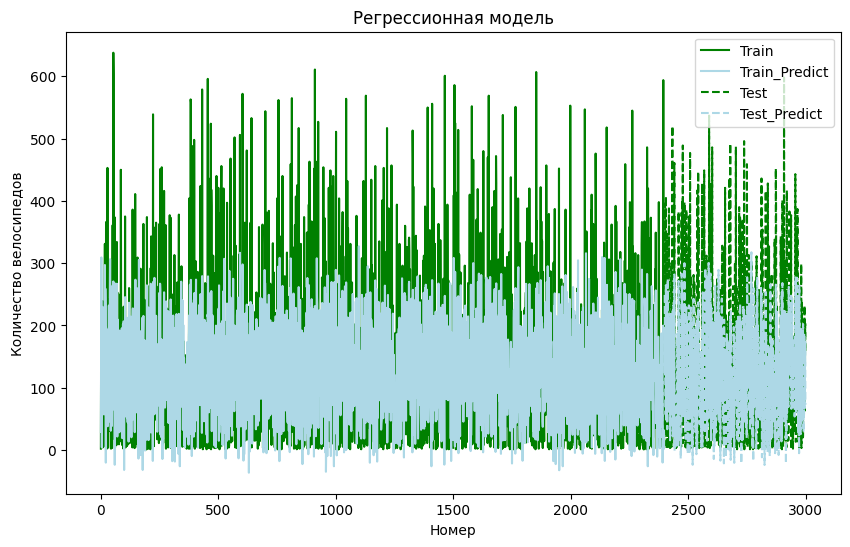

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(train['count'].index, train['count'], color='green', linestyle='solid')
ax.plot(train['count'].index, res_y_tr, color='lightblue', linestyle='solid')
ax.plot(test['count'].index, test['count'], color='green', linestyle='dashed')
ax.plot(test['count'].index, res_y_ts, color='lightblue', linestyle='dashed')

ax.set(title="Регрессионная модель", xlabel="Номер", ylabel="Количество велосипедов")
ax.legend(['Train', 'Train_Predict', 'Test', 'Test_Predict'])
plt.show()

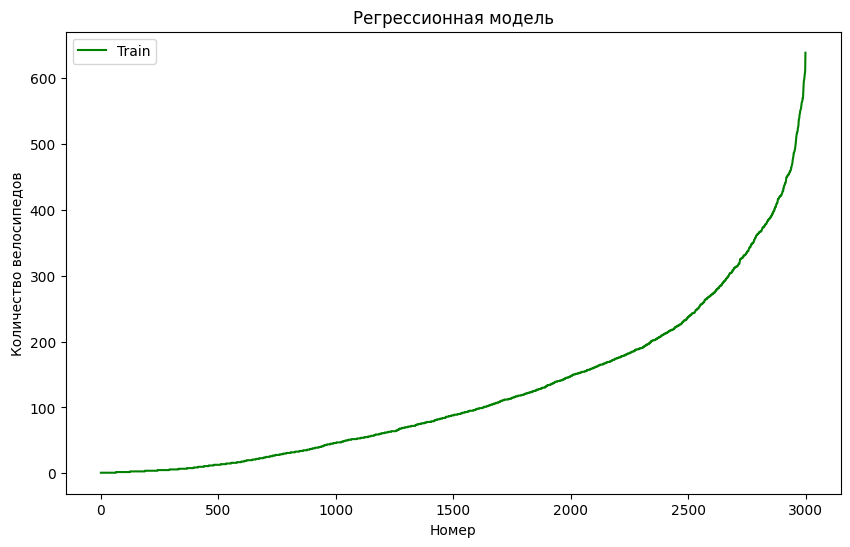

In [ ]:
data2 = data.sort_values(by='count').reset_index()

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(data2['count'].index, data2['count'], color='green', linestyle='solid')

ax.set(title="Регрессионная модель", xlabel="Номер", ylabel="Количество велосипедов")
ax.legend(['Train', 'Test'])
plt.show()

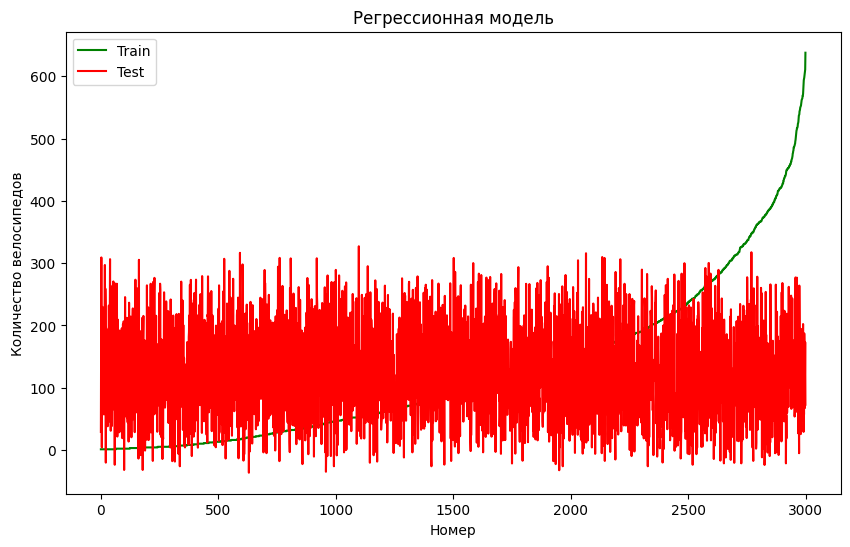

In [ ]:
test_x2 = data.drop(['count'], axis=1, inplace=False)
res_y_ts2 = a + b*test_x2['holiday'] + c*test_x2['humidity'] + d*test_x2['summer'] + e*test_x2['temp'] + i*test_x2['windspeed'] + j*test_x2['workingday']

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(data2['count'].index, data2['count'], color='green', linestyle='solid')
ax.plot(data2['count'].index, res_y_ts2, color='red', linestyle='solid')


ax.set(title="Регрессионная модель", xlabel="Номер", ylabel="Количество велосипедов")
ax.legend(['Train', 'Test'])
plt.show()

In [ ]:
res1 = pd.DataFrame()
res2 = pd.DataFrame()

res1 = [1 if data['count'][i] > 100 else 0 for i in range(len(data))]
res2 = [1 if res_y[i] > 100 else 0 for i in range(len(res_y))]

precision = round(precision_score(res1, res2) * 100, 2)
recall = round(recall_score(res1, res2) * 100, 2)
accuracy = round(accuracy_score(res1, res2) * 100, 2)
f1 = round(f1_score(res1, res2) * 100, 2)
roc_auc = round(roc_auc_score(res1, res2) * 100, 2)

print('precision', precision)
print('recall', recall)
print('accuracy', accuracy)
print('f1', f1)
print('roc_auc', roc_auc)

precision 65.29
recall 84.22
accuracy 72.37
f1 73.56
roc_auc 73.32


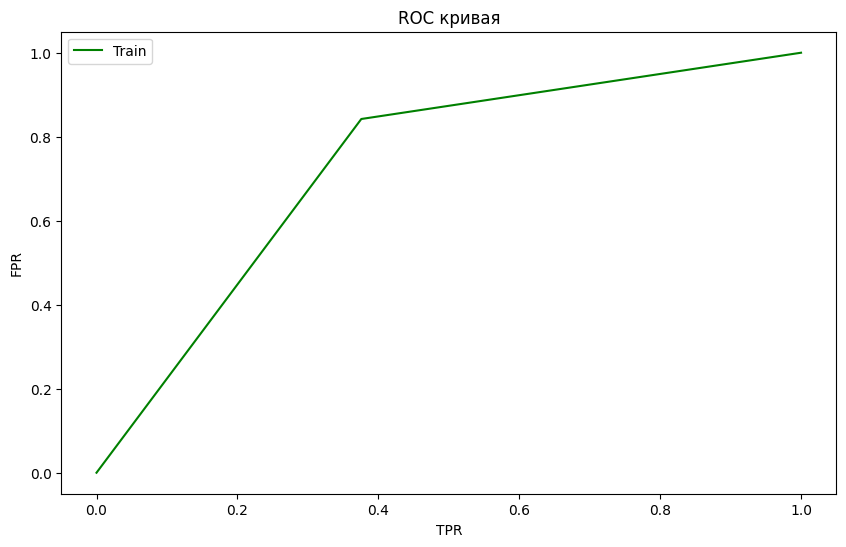

In [ ]:
fpr, tpr, _ = roc_curve(res1, res2)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(fpr, tpr, color='green', linestyle='solid')

ax.set(title="ROC кривая", xlabel="TPR", ylabel="FPR")
ax.legend(['Train', 'Test'])
plt.show()

**Классификация**

In [ ]:
data_k = data
data_k['cls']= [1 if data['count'][i] > 100 else 0 for i in range(len(data))]

train_k_x = data_k.drop(['cls'], axis = 1, inplace = False)[0:n]
train_k_y = data_k['cls'][0:n]

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(train_k_x, train_k_y)

KNeighborsClassifier(n_neighbors=2)
res_y_k = neigh.predict(data_k.drop(['cls'], axis = 1, inplace = False))

precision = round(precision_score(data_k['cls'], res_y_k) * 100, 2)
recall = round(recall_score(data_k['cls'], res_y_k) * 100, 2)
accuracy = round(accuracy_score(data_k['cls'], res_y_k) * 100, 2)
f1 = round(f1_score(data_k['cls'], res_y_k) * 100, 2)
roc_auc = round(roc_auc_score(data_k['cls'], res_y_k) * 100, 2)

print('precision', precision)
print('recall', recall)
print('accuracy', accuracy)
print('f1', f1)
print('roc_auc', roc_auc)

precision 99.93
recall 98.83
accuracy 99.43
f1 99.38
roc_auc 99.38


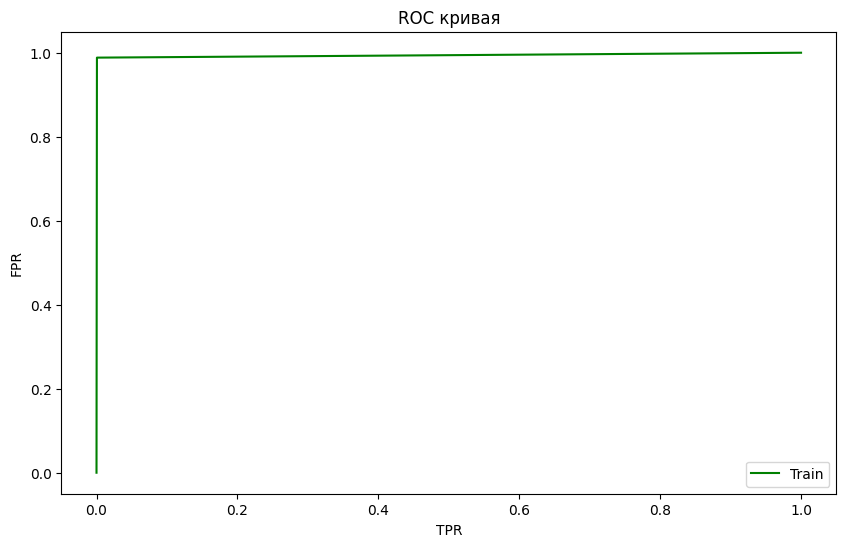

In [ ]:
fpr, tpr, _ = roc_curve(data_k['cls'], res_y_k)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(fpr, tpr, color='green', linestyle='solid')

ax.set(title="ROC кривая", xlabel="TPR", ylabel="FPR")
ax.legend(['Train', 'Test'])
plt.show()